# Preprocessing Gempa Bumi

Anggota:
- Ahmad Danindra Nugroho (5025211259)
- Muhammad Ghifari Taqiuddin (5025211063)
- Raihan Farid (5025201141)
- Talitha Hayyinas Sahala (5025211263)

# Preparations

In [1]:
# Installing dependencies
# Only run once
%pip install gnews nlp-id PySastrawi pillow matplotlib numpy wordcloud pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import all dependencies
from nlp_id import tokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import os

In [3]:
# Directory for all related files
dataset_dir = '../dataset/'
os.makedirs(dataset_dir, exist_ok=True)

In [4]:
os.listdir(dataset_dir)

['Gempa Bumi-2018-2023.csv',
 'Kebakaran-2018-2023.csv',
 'Banjir-2018-2023.csv',
 'Kecelakaan-2018-2023.csv']

## Loading Dataset

In [5]:
df = pd.read_csv(os.path.join(dataset_dir, 'Gempa Bumi-2018-2023.csv'))
df = df.drop(columns=['description' , 'url', 'publisher'])
df['title'] = df['title'].apply(lambda x: x.split(' - ')[0])
df = df[['published date', 'title']]
print(df.shape)
df.head()

(6039, 2)


,published date,title
0,2018-01-11 08:00:00+00:00,"Gempa bumi 5,1 SR mengguncang Iran"
1,2018-01-12 08:00:00+00:00,Gempa Tektonik 4 SR Guncang Nias Selatan
2,2018-01-12 08:00:00+00:00,Gempa bumi guncang wilayah Luwu Timur
3,2018-01-18 08:00:00+00:00,5 Meteor yang Pernah Jatuh di Indonesia
4,2018-01-20 10:32:09+00:00,Gerak Cepat Tanpa Pembedaan


## Preprocessing

1. Casefolding: mengubah semua karakter huruf ke huruf kecil
2. Stemming: mengubah suatu kata menjadi bentuk dasarnya (mengatakan -> kata)
3. Tokenization: memecah kalimat menjadi beberapa token
4. Stopwords Removal: memfilter kata yang sering muncul tapi tidak berpengaruh dalam pemrosesan (tergantung umumnya konjungsi, preposisi, pronomina, dsb.)

In [6]:
# 1. Casefolding
df['title'] = df['title'].str.lower()
df.head()

,published date,title
0,2018-01-11 08:00:00+00:00,"gempa bumi 5,1 sr mengguncang iran"
1,2018-01-12 08:00:00+00:00,gempa tektonik 4 sr guncang nias selatan
2,2018-01-12 08:00:00+00:00,gempa bumi guncang wilayah luwu timur
3,2018-01-18 08:00:00+00:00,5 meteor yang pernah jatuh di indonesia
4,2018-01-20 10:32:09+00:00,gerak cepat tanpa pembedaan


In [7]:
# 2. Stemming
# Menggunakan stemmer dari library PySastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['stem'] = df['title'].apply(stemmer.stem)
df.head()

,published date,title,stem
0,2018-01-11 08:00:00+00:00,"gempa bumi 5,1 sr mengguncang iran",gempa bumi 5 1 sr guncang iran
1,2018-01-12 08:00:00+00:00,gempa tektonik 4 sr guncang nias selatan,gempa tektonik 4 sr guncang nias selatan
2,2018-01-12 08:00:00+00:00,gempa bumi guncang wilayah luwu timur,gempa bumi guncang wilayah luwu timur
3,2018-01-18 08:00:00+00:00,5 meteor yang pernah jatuh di indonesia,5 meteor yang pernah jatuh di indonesia
4,2018-01-20 10:32:09+00:00,gerak cepat tanpa pembedaan,gerak cepat tanpa beda


In [8]:
# 3. Tokenization
# Menggunakan tokenizer dari library nlp-id
tok = tokenizer.Tokenizer()

df['tokens'] = df['stem'].apply(tok.tokenize)
df.head()

,published date,title,stem,tokens
0,2018-01-11 08:00:00+00:00,"gempa bumi 5,1 sr mengguncang iran",gempa bumi 5 1 sr guncang iran,"[gempa, bumi, 5, 1, sr, guncang, iran]"
1,2018-01-12 08:00:00+00:00,gempa tektonik 4 sr guncang nias selatan,gempa tektonik 4 sr guncang nias selatan,"[gempa, tektonik, 4, sr, guncang, nias, selatan]"
2,2018-01-12 08:00:00+00:00,gempa bumi guncang wilayah luwu timur,gempa bumi guncang wilayah luwu timur,"[gempa, bumi, guncang, wilayah, luwu, timur]"
3,2018-01-18 08:00:00+00:00,5 meteor yang pernah jatuh di indonesia,5 meteor yang pernah jatuh di indonesia,"[5, meteor, yang, pernah, jatuh, di, indonesia]"
4,2018-01-20 10:32:09+00:00,gerak cepat tanpa pembedaan,gerak cepat tanpa beda,"[gerak, cepat, tanpa, beda]"


In [10]:
# 4. Stopwords removal
# Menggunakan list stopwords dari library nltk
list_stopwords = set(stopwords.words('indonesian'))


def remove_stopwords(tokens):
    return [word for word in tokens if word not in list_stopwords]

keywords = ("tips")
mask = df['title'].str.contains(keywords)
df = df[~mask]

df['tokens_clean'] = df['tokens'].apply(remove_stopwords)
df.head()

,published date,title,stem,tokens,tokens_clean
0,2018-01-11 08:00:00+00:00,"gempa bumi 5,1 sr mengguncang iran",gempa bumi 5 1 sr guncang iran,"[gempa, bumi, 5, 1, sr, guncang, iran]","[gempa, bumi, 5, 1, sr, guncang, iran]"
1,2018-01-12 08:00:00+00:00,gempa tektonik 4 sr guncang nias selatan,gempa tektonik 4 sr guncang nias selatan,"[gempa, tektonik, 4, sr, guncang, nias, selatan]","[gempa, tektonik, 4, sr, guncang, nias, selatan]"
2,2018-01-12 08:00:00+00:00,gempa bumi guncang wilayah luwu timur,gempa bumi guncang wilayah luwu timur,"[gempa, bumi, guncang, wilayah, luwu, timur]","[gempa, bumi, guncang, wilayah, luwu, timur]"
3,2018-01-18 08:00:00+00:00,5 meteor yang pernah jatuh di indonesia,5 meteor yang pernah jatuh di indonesia,"[5, meteor, yang, pernah, jatuh, di, indonesia]","[5, meteor, jatuh, indonesia]"
4,2018-01-20 10:32:09+00:00,gerak cepat tanpa pembedaan,gerak cepat tanpa beda,"[gerak, cepat, tanpa, beda]","[gerak, cepat, beda]"


In [11]:
df[df['title'].str.contains("tips")]

,published date,title,stem,tokens,tokens_clean


In [12]:
# Mengecek jumlah data dalam DataFrame
jumlah_data = df.shape[0]
print("Jumlah data dalam DataFrame adalah:", jumlah_data)

Jumlah data dalam DataFrame adalah: 6023


In [13]:
# Gabungkan kembali token pada kolom 'tokens_clean'
df['merged'] = df['tokens_clean'].apply(lambda token: ' '.join(token))
df.head()

,published date,title,stem,tokens,tokens_clean,merged
0,2018-01-11 08:00:00+00:00,"gempa bumi 5,1 sr mengguncang iran",gempa bumi 5 1 sr guncang iran,"[gempa, bumi, 5, 1, sr, guncang, iran]","[gempa, bumi, 5, 1, sr, guncang, iran]",gempa bumi 5 1 sr guncang iran
1,2018-01-12 08:00:00+00:00,gempa tektonik 4 sr guncang nias selatan,gempa tektonik 4 sr guncang nias selatan,"[gempa, tektonik, 4, sr, guncang, nias, selatan]","[gempa, tektonik, 4, sr, guncang, nias, selatan]",gempa tektonik 4 sr guncang nias selatan
2,2018-01-12 08:00:00+00:00,gempa bumi guncang wilayah luwu timur,gempa bumi guncang wilayah luwu timur,"[gempa, bumi, guncang, wilayah, luwu, timur]","[gempa, bumi, guncang, wilayah, luwu, timur]",gempa bumi guncang wilayah luwu timur
3,2018-01-18 08:00:00+00:00,5 meteor yang pernah jatuh di indonesia,5 meteor yang pernah jatuh di indonesia,"[5, meteor, yang, pernah, jatuh, di, indonesia]","[5, meteor, jatuh, indonesia]",5 meteor jatuh indonesia
4,2018-01-20 10:32:09+00:00,gerak cepat tanpa pembedaan,gerak cepat tanpa beda,"[gerak, cepat, tanpa, beda]","[gerak, cepat, beda]",gerak cepat beda


## Visualisasi WordCloud

Pembanding data antara sebelum dan setelah dilakukan pra-pemrosesan

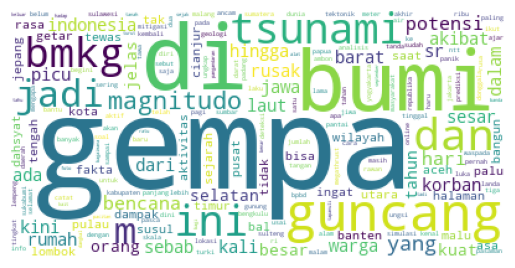

In [14]:
text_before = ' '.join(df['stem'].tolist())
wordcloud_before = WordCloud(background_color='white', collocations=False).generate(text_before)

plt.imshow(wordcloud_before)
plt.axis("off")
plt.show()

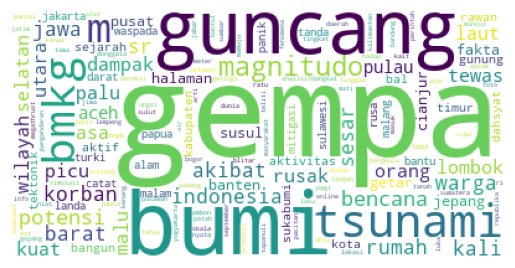

In [15]:
text_after = ' '.join(df['merged'])
wordcloud_after = WordCloud(background_color='white', collocations=False).generate(text_after)

plt.imshow(wordcloud_after)
plt.axis("off")
plt.show()

In [16]:
# Simpan output ke dalam CSV
df.to_csv('Gempa Bumi-2018-2023-pre.csv', index=False)